In [1]:
# Run the command below if necessary, for example with Google Colab
#!python3 -m pip install mxnet-cu117

In [7]:
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd

In [8]:
# Perceptron Model
def perceptron(weights, bias, features):
    return mx.nd.dot(features, weights) + bias

In [9]:
# Activation Functions
def linear(x):
    return x
    
def relu(x):
    return (x > 0) * x

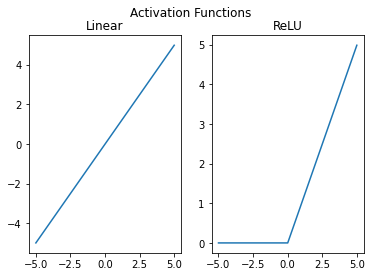

In [12]:
# Input Data
inputs = np.arange(-5, 5, 0.01)

fig, axs = plt.subplots(1, 2)
fig.suptitle("Activation Functions")
axs[0].set_title("Linear")
axs[0].plot(inputs, linear(inputs))
axs[1].set_title("ReLU")
axs[1].plot(inputs, relu(inputs))

In [4]:
# Loading data
house_df = pd.read_csv("kc_house_data.csv")

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Only interested in living square feet, bathrooms and grade
house_df = house_df[["price", "sqft_living", "bathrooms", "grade"]]

In [7]:
house_df.head()

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8


In [8]:
# One-hot encoding
grade_onehot = pd.get_dummies(house_df.grade)
house_df = pd.concat([house_df, grade_onehot], axis=1)
house_df = house_df.drop("grade", axis=1)

In [9]:
house_df.head()

,price,sqft_living,bathrooms,1,3,4,5,6,7,8,9,10,11,12,13
0,221900.0,1180,1.00,0,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,2.25,0,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,770,1.00,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,1960,3.00,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,1680,2.00,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
# Number of Features: number of columns of dataframe except output (price)

number_of_features = len(house_df.columns) - 1
print(number_of_features)

14


In [11]:
# Number of outputs: 1 (price)
number_of_outputs = 1

In [12]:
# Model Parameters Definition + Initialization
weights = mx.nd.random_normal(shape=(number_of_features, number_of_outputs))
bias = mx.nd.random_normal(shape=number_of_outputs)
print("Weights:")
print(weights)
print()
print("Bias:")
print(bias)

Weights:

[[ 2.2122064 ]
 [ 0.7740038 ]
 [ 1.0434403 ]
 [ 1.1839255 ]
 [ 1.8917114 ]
 [-1.2347414 ]
 [-1.771029  ]
 [-0.45138445]
 [ 0.57938355]
 [-1.856082  ]
 [-1.9768796 ]
 [-0.20801921]
 [ 0.2444218 ]
 [-0.03716067]]
<NDArray 14x1 @cpu(0)>

Bias:

[-0.48774993]
<NDArray 1 @cpu(0)>


In [13]:
# Input features of an example
example_input = mx.nd.array(house_df.iloc[0].drop("price").to_numpy())
print(example_input)


[1.18e+03 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
<NDArray 14 @cpu(0)>


In [14]:
# Expected output of the example (price)
expected_output = house_df.iloc[0].price
print(expected_output)

221900.0


In [15]:
# Calculate the prediction of our model
model_output = perceptron(weights, bias, example_input).asnumpy()[0]
print(model_output)

2610.2383


In [16]:
# How much error
error_abs = abs(expected_output - model_output)
error_perc = error_abs / expected_output * 100
print("Absolute Error:", error_abs)
print("Relative Error (%):", error_perc)

Absolute Error: 219289.76171875
Relative Error (%): 98.82368711976115
